Matplotlib created a temporary cache directory at C:\Users\RISHI0~1\AppData\Local\Temp\matplotlib-cimbmbnc because the default path (C:\Users\Rishi0121\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Naive Bayes Model MSE: 0.13632
Naive Bayes Model R² Score: 0.45459924041805755


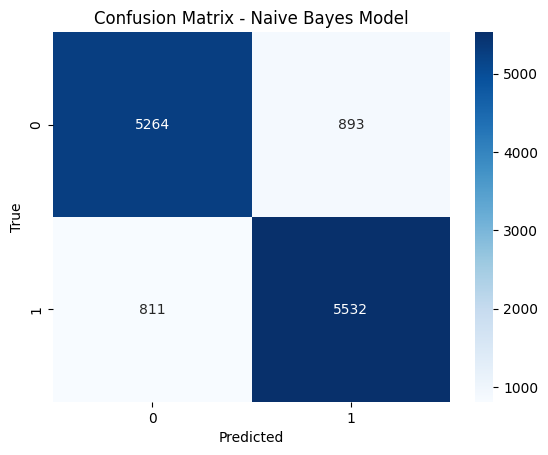


Summary of Results:
Naive Bayes Model MSE: 0.1363
Naive Bayes Model R² Score: 0.4546


In [1]:
#Navie Bayes
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset from the given path
path = "D:/Notes/Semester 5/Deep Learning/Paper/Dataset/archive/IMDB Dataset.csv"
data = pd.read_csv(path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text.strip()

# Apply preprocessing to reviews
data['review'] = data['review'].apply(preprocess_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Transform the text data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict using the Naive Bayes model
y_pred = nb_model.predict(X_test_tfidf)

# Calculate MSE and R² Score
mse_nb = mean_squared_error(y_test, y_pred)
r2_nb = r2_score(y_test, y_pred)

print("\nNaive Bayes Model MSE:", mse_nb)
print("Naive Bayes Model R² Score:", r2_nb)

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Summary of Results for Naive Bayes
print("\nSummary of Results:")
print(f"Naive Bayes Model MSE: {mse_nb:.4f}")
print(f"Naive Bayes Model R² Score: {r2_nb:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Logistic Regression Model MSE: 0.106
Logistic Regression Model R² Score: 0.5759060995034779


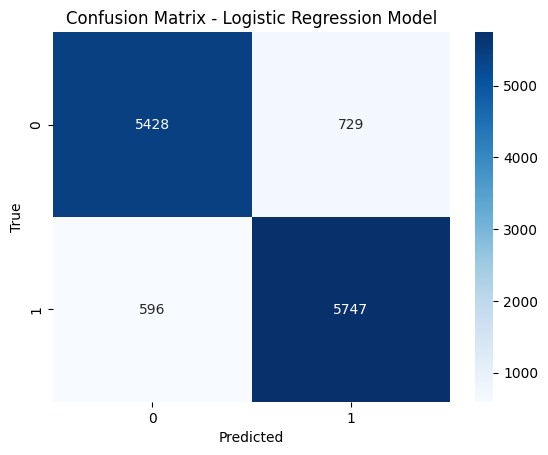


Summary of Results:
Logistic Regression Model MSE: 0.1060
Logistic Regression Model R² Score: 0.5759


In [2]:
#Logistic Regression
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset from the given path
path = "D:/Notes/Semester 5/Deep Learning/Paper/Dataset/archive/IMDB Dataset.csv"
data = pd.read_csv(path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text.strip()

# Apply preprocessing to reviews
data['review'] = data['review'].apply(preprocess_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Transform the text data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression classifier
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_tfidf, y_train)

# Predict using the Logistic Regression model
y_pred = logreg_model.predict(X_test_tfidf)

# Calculate MSE and R² Score
mse_logreg = mean_squared_error(y_test, y_pred)
r2_logreg = r2_score(y_test, y_pred)

print("\nLogistic Regression Model MSE:", mse_logreg)
print("Logistic Regression Model R² Score:", r2_logreg)

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Summary of Results for Logistic Regression
print("\nSummary of Results:")
print(f"Logistic Regression Model MSE: {mse_logreg:.4f}")
print(f"Logistic Regression Model R² Score: {r2_logreg:.4f}")

In [3]:
#Gradient Boost
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('stopwords')

nltk.download('wordnet')

# Load the dataset from the given path
path = "D:/Notes/Semester 5/Deep Learning/Paper/Dataset/archive/IMDB Dataset.csv"
data = pd.read_csv(path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text.strip()

# Apply preprocessing to reviews
data['review'] = data['review'].apply(preprocess_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Transform the text data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train_tfidf, y_train)

# Predict using the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_tfidf)

# Calculate MSE and R² Score
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Model MSE:", mse_gb)
print("Gradient Boosting Model R² Score:", r2_gb)

# Summary of Results for Gradient Boosting
print("\nSummary of Results:")
print(f"Gradient Boosting Model MSE: {mse_gb:.4f}")
print(f"Gradient Boosting Model R² Score: {r2_gb:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Gradient Boosting Model MSE: 0.18904
Gradient Boosting Model R² Score: 0.24367253820884394

Summary of Results:
Gradient Boosting Model MSE: 0.1890
Gradient Boosting Model R² Score: 0.2437


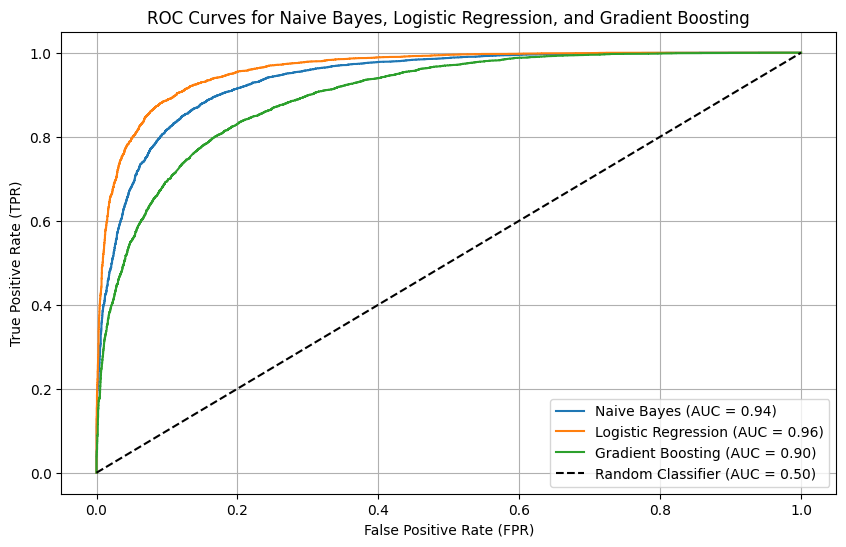

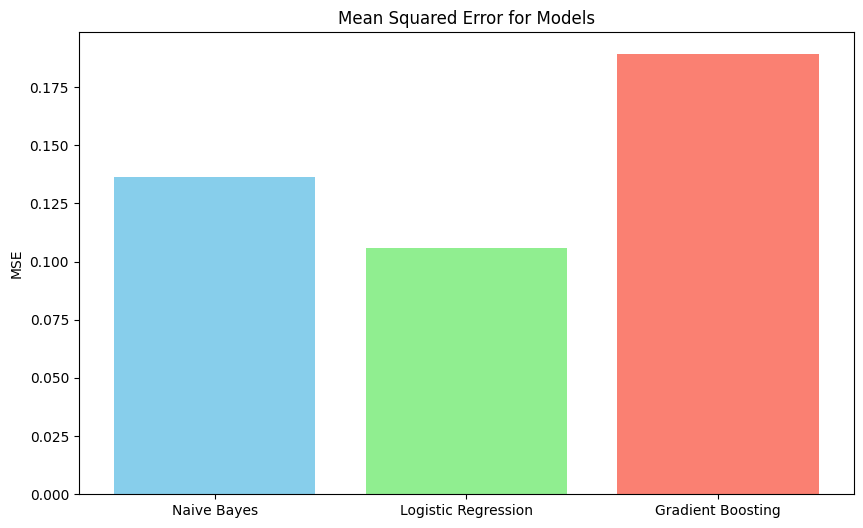


Model Performance Summary:
Naive Bayes - AUC: 0.9386, MSE: 0.1363
Logistic Regression - AUC: 0.9610, MSE: 0.1060
Gradient Boosting - AUC: 0.8995, MSE: 0.1890


In [4]:
# Import necessary libraries for graphing and metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Initialize variables to store metrics
model_names = ['Naive Bayes', 'Logistic Regression', 'Gradient Boosting']
predictions = [nb_model.predict_proba(X_test_tfidf)[:, 1],
               logreg_model.predict_proba(X_test_tfidf)[:, 1],
               gb_model.predict_proba(X_test_tfidf)[:, 1]]
truth = y_test

# Compute ROC and AUC for each model
fpr = {}
tpr = {}
roc_auc = {}

for i, model_name in enumerate(model_names):
    fpr[model_name], tpr[model_name], _ = roc_curve(truth, predictions[i])
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for model_name in model_names:
    plt.plot(fpr[model_name], tpr[model_name], label=f'{model_name} (AUC = {roc_auc[model_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curves for Naive Bayes, Logistic Regression, and Gradient Boosting')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot Loss Graphs
loss_values = {
    "Naive Bayes": mean_squared_error(y_test, nb_model.predict(X_test_tfidf)),
    "Logistic Regression": mean_squared_error(y_test, logreg_model.predict(X_test_tfidf)),
    "Gradient Boosting": mean_squared_error(y_test, gb_model.predict(X_test_tfidf))
}

plt.figure(figsize=(10, 6))
plt.bar(loss_values.keys(), loss_values.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Mean Squared Error for Models')
plt.ylabel('MSE')
plt.show()

# Summary Table
print("\nModel Performance Summary:")
for model_name in model_names:
    print(f"{model_name} - AUC: {roc_auc[model_name]:.4f}, MSE: {loss_values[model_name]:.4f}")
